In [22]:
import networkx as nx
import pandas as pd

def csv_to_graph(file_id_nodes: str, file_id_edges: str, origin: str = 'book') \
                    -> nx.graph:
    """Return a nx.graph
    
    Build a graph given a csv file for nodes and edge.
    origin controls the source of the graph to adapt the node features.
    """
    
    if origin == 'book':
        key1, key2 = 'weight', 'book'
    elif origin == 'script':
        key1, key2 = 'Weight', 'Season'
    else:
        raise NameError('Unknown origin {}'.format(origin))
        
    nodes = pd.read_csv(file_id_nodes)
    edges = pd.read_csv(file_id_edges)

    if key2 not in edges:
        key2 = 'id'
        
    g = nx.Graph()
    for row in nodes.iterrows():
        g.add_node(row[1]['Id'], name=row[1]['Label'])

    for row in edges.iterrows():
        g.add_edge(row[1]['Source'],row[1]['Target'], 
                   weight=1/row[1][key1], id=row[1][key2])

    return g


In [23]:
g = csv_to_graph("got-s3-nodes.csv", "got-s3-edges.csv", origin="script")

AttributeError: module 'matplotlib.pyplot' has no attribute 'ishold'

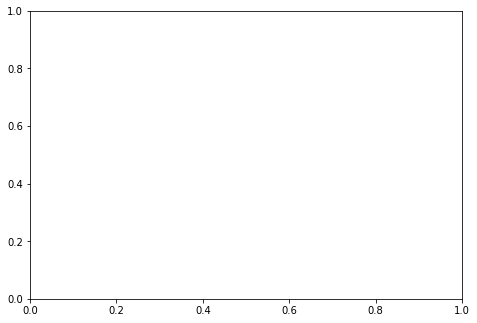

In [24]:
nx.draw(g)

# Mètriques del graf

### Digues l'ordre i mida del graf així el grau mitjà dels seus nodes.

In [ ]:
print("Ordre:",g.order())

In [18]:
print("Mida:",g.size())

Mida: 504


In [19]:
suma = sum(dict(nx.degree(g)).values())
print("Grau mitjà:", suma/g.order())

Grau mitjà: 8.129032258064516


In [20]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 124
Number of edges: 504
Average degree:   8.1290


### Es tracta d'un graf connectat? En cas que no ho sigui, indica el nombre de components connexes

In [21]:
print("Es un graf connectat") if nx.is_connected(g) else print("No es un graf connectat")

Es un graf connectat
